# Cell 1: Load & Prep Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load combined results (pastikan file ada di folder kerja)
df = pd.read_csv("fs_result_domain_final.csv")

# Pivot untuk combined heatmap: rows=FS_Method, cols=Domain
heatmap_data = df.pivot_table(
    index="FS_Method",
    columns="Domain",
    values="F1_mean",
    aggfunc="mean"
)


# Cell 2: Combined Heatmap Macro‐F1 Across Domains


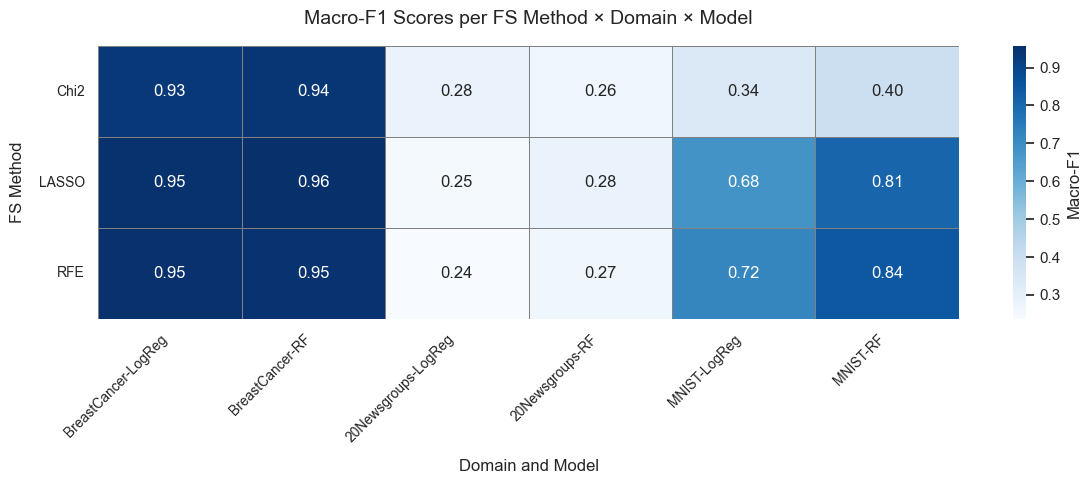

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("fs_result_domain_final.csv")

# 2. Pivot ke matrix FS_Method × (Domain, Model)
pivot_all = df.pivot(index="FS_Method",
                     columns=["Domain", "Model"],
                     values="F1_mean")

# 3. Atur style
sns.set_theme(style="whitegrid")

# 4. Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 5))

# 5. Plot heatmap dengan garis batas antar sel
sns.heatmap(
    pivot_all,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Macro-F1"},
    linewidths=0.5,
    linecolor="gray",
    ax=ax
)

# 6. Kustomisasi label
ax.set_title("Macro-F1 Scores per FS Method × Domain × Model", pad=16, fontsize=14)
ax.set_xlabel("Domain and Model", labelpad=10, fontsize=12)
ax.set_ylabel("FS Method", labelpad=10, fontsize=12)

# 7. Rotasi dan styling tick labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# 8. Tata letak rapat
plt.tight_layout()

# 9. Tampilkan
plt.show()


# Cell 3: Barplot Average Execution Time per FS Method


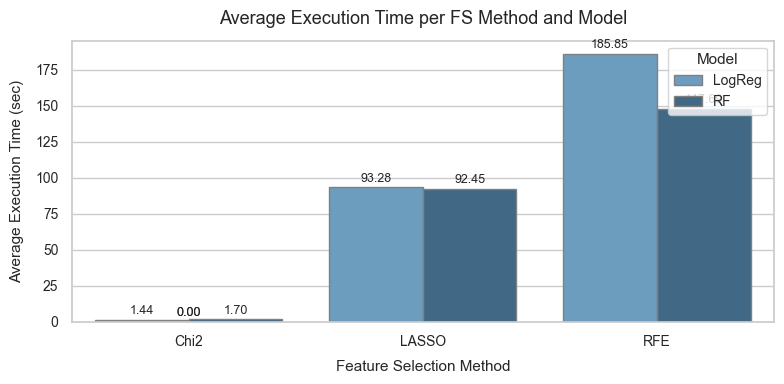

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Muat data
df = pd.read_csv("fs_result_domain_final.csv")  # atau "fs_result_domain_final.csv" sesuai nama file Anda

# 2. Hitung rata-rata waktu eksekusi per FS_Method dan Model
time_avg = (
    df
    .groupby(["FS_Method", "Model"])["Time_sec"]
    .mean()
    .reset_index()
)

# 3. Atur tema
sns.set_theme(style="whitegrid")

# 4. Buat figure
fig, ax = plt.subplots(figsize=(8, 4))

# 5. Plot grouped bar plot
sns.barplot(
    data=time_avg,
    x="FS_Method",
    y="Time_sec",
    hue="Model",
    palette="Blues_d",
    edgecolor="gray",
    ax=ax
)

# 6. Anotasi nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + time_avg.Time_sec.max()*0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# 7. Kustomisasi label & judul
ax.set_xlabel("Feature Selection Method", fontsize=11, labelpad=8)
ax.set_ylabel("Average Execution Time (sec)", fontsize=11, labelpad=8)
ax.set_title("Average Execution Time per FS Method and Model", fontsize=13, pad=12)

# 8. Styling ticks & legend
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(title="Model", fontsize=10, title_fontsize=11, loc="upper right")

# 9. Tata letak rapat
plt.tight_layout()

# 10. Tampilkan
plt.show()


# Cell 4: Average Rank of FS Methods Across Domains


C:\Users\rozak\AppData\Local\Temp\ipykernel_7824\3802710861.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


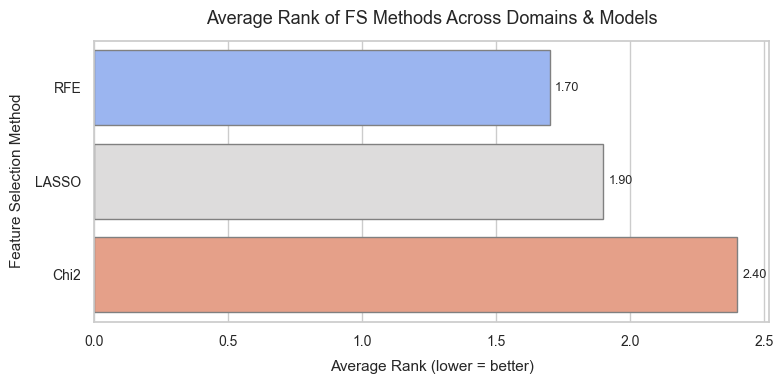

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Muat data
df = pd.read_csv("fs_result_domain.csv")  # ganti sesuai nama file kamu

# 2. Hitung rata-rata F1_mean untuk tiap kombinasi Domain & Model
block_means = (
    df
    .groupby(["Domain", "Model", "FS_Method"])["F1_mean"]
    .mean()
    .reset_index()
)

# 3. Pivot menjadi matrix: rows=FS_Method, cols=Domain–Model
pivot = block_means.pivot_table(
    index="FS_Method",
    columns=["Domain", "Model"],
    values="F1_mean"
)

# 4. Untuk tiap kolom (block), rank FS_Method (rank 1 = tertinggi F1)
ranks = pivot.rank(ascending=False, axis=0)

# 5. Rata-rata peringkat tiap FS_Method di semua block
avg_ranks = ranks.mean(axis=1).sort_values()

# 6. Plot barplot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(
    x=avg_ranks.values,
    y=avg_ranks.index,
    palette="coolwarm",
    edgecolor="gray",
    ax=ax
)

# 7. Anotasi nilai peringkat di ujung bar
for i, v in enumerate(avg_ranks.values):
    ax.text(v + 0.02, i, f"{v:.2f}", va="center", fontsize=9)

# 8. Label & Title
ax.set_xlabel("Average Rank (lower = better)", fontsize=11, labelpad=8)
ax.set_ylabel("Feature Selection Method", fontsize=11, labelpad=8)
ax.set_title("Average Rank of FS Methods Across Domains & Models", fontsize=13, pad=12)

# 9. Ticks styling
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


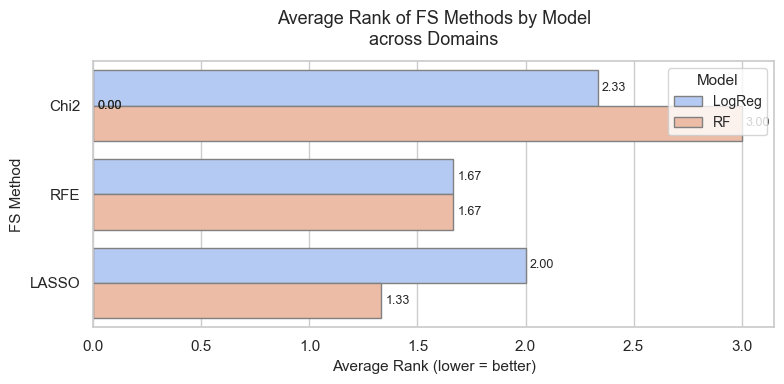

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# 1. Load data
df = pd.read_csv("fs_result_domain_final.csv")  # atau nama file CSV yang Anda pakai

# 2. Siapkan list domain & model
domains = df["Domain"].unique()
models  = df["Model"].unique()
fs_methods = df["FS_Method"].unique()

# 3. Hitung average rank per FS_Method untuk tiap model
rank_dict = {m: [] for m in models}

for m in models:
    for dom in domains:
        sub = df[(df.Domain==dom) & (df.Model==m)]
        # rata2 F1 per metode
        mean_f1 = sub.groupby("FS_Method")["F1_mean"].mean().reindex(fs_methods)
        # ranking (1 = tertinggi)
        ranks = rankdata(-mean_f1.values)
        rank_dict[m].append(ranks)

# 4. Rata-rata rank across domains untuk tiap model
avg_rank = {}
for m in models:
    arr = np.vstack(rank_dict[m])           # shape = (n_domains, n_methods)
    avg_rank[m] = arr.mean(axis=0)          # rata per metode

# 5. Buat DataFrame untuk plot
rank_df = pd.DataFrame(avg_rank, index=fs_methods).reset_index()
rank_df = rank_df.melt(id_vars="index", var_name="Model", value_name="AvgRank")
rank_df.rename(columns={"index":"FS_Method"}, inplace=True)

# 6. Plot grouped barplot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(
    data=rank_df,
    x="AvgRank",
    y="FS_Method",
    hue="Model",
    palette="coolwarm",
    edgecolor="gray",
    ax=ax
)

# 7. Anotasi nilai rank
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(
        w + 0.02, y,
        f"{w:.2f}",
        va="center",
        fontsize=9
    )

# 8. Labels & title
ax.set_xlabel("Average Rank (lower = better)", fontsize=11)
ax.set_ylabel("FS Method", fontsize=11)
ax.set_title("Average Rank of FS Methods by Model\nacross Domains", fontsize=13, pad=12)

# 9. Legend & layout
ax.legend(title="Model", fontsize=10, title_fontsize=11, loc="upper right")
plt.tight_layout()
plt.show()


# Cell 5 (opsional): Boxplot Distribusi Macro-F1 (All Domains)


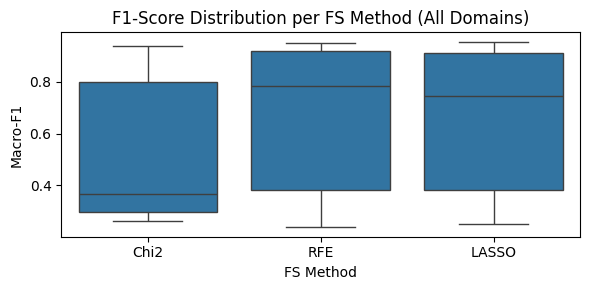

In [5]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x="FS_Method", y="F1_mean")
plt.xlabel("FS Method")
plt.ylabel("Macro-F1")
plt.title("F1-Score Distribution per FS Method (All Domains)")
plt.tight_layout()
plt.show()


# Cell X: Barplot Rata-rata Memory Usage per FS Method (All Domains)


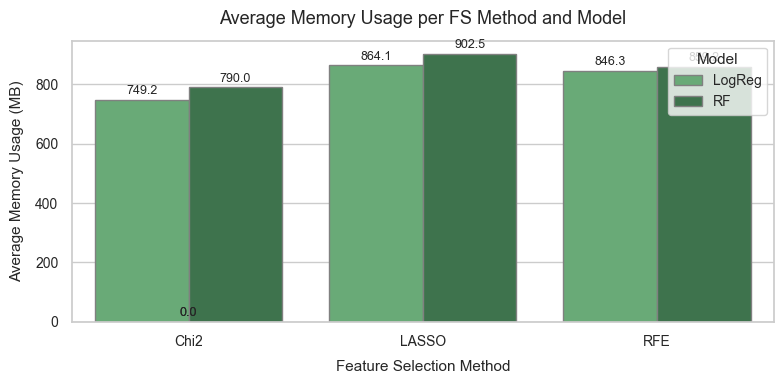

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Muat data
df = pd.read_csv("fs_result_domain_final.csv")  # atau sesuai nama file CSV Anda

# 2. Hitung rata-rata Memory_MB per FS_Method dan Model
mem_avg = (
    df
    .groupby(["FS_Method", "Model"])["Memory_MB"]
    .mean()
    .reset_index()
)

# 3. Atur tema seaborn
sns.set_theme(style="whitegrid")

# 4. Buat figure
fig, ax = plt.subplots(figsize=(8, 4))

# 5. Plot grouped bar plot dengan hue=Model
sns.barplot(
    data=mem_avg,
    x="FS_Method",
    y="Memory_MB",
    hue="Model",
    palette="Greens_d",
    edgecolor="gray",
    ax=ax
)

# 6. Anotasi nilai di atas tiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + mem_avg.Memory_MB.max() * 0.01,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# 7. Kustomisasi label & judul
ax.set_xlabel("Feature Selection Method", fontsize=11, labelpad=8)
ax.set_ylabel("Average Memory Usage (MB)", fontsize=11, labelpad=8)
ax.set_title("Average Memory Usage per FS Method and Model", fontsize=13, pad=12)

# 8. Styling ticks & legend
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(title="Model", fontsize=10, title_fontsize=11, loc="upper right")

# 9. Tata letak rapat
plt.tight_layout()

# 10. Tampilkan
plt.show()


# Cell Y (opsional): Boxplot Distribusi Memory Usage per FS Method


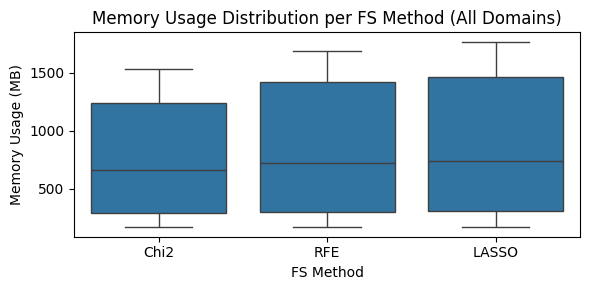

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x="FS_Method", y="Memory_MB")
plt.xlabel("FS Method")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage Distribution per FS Method (All Domains)")
plt.tight_layout()
plt.show()
